<a href="https://colab.research.google.com/github/joaovfin/Projetos/blob/main/_08_API_Binance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Binance - API e Funções**

Instalando pacote "binance" para carregar e manipular os dados de criptomoedas

Documentação API BINANCE:

https://binance-docs.github.io/apidocs/spot/en/

In [ ]:
!pip install python-binance
from binance.client import Client

A chave e senha são criadas na sua conta da BINANCE, é permitido carregar dados, acompanhar operações, enviar ordens...

In [3]:
api_key='daksdmalsd' #Coloque aqui sua API KEY
api_secret='daksdmalsd' #Coloque aqui sua API SECRET

In [4]:
#Realizando a ligação do API com minha conta
client=Client(api_key=api_key,api_secret=api_secret)

In [ ]:
#Obtendo todos os pares de moedas
precos=client.get_all_tickers()
precos

In [7]:
#Média de preços -> Últimos 100 preços dos último 5 minutos
preco_medio=client.get_avg_price(symbol='BTCBRL')
preco_medio

{'mins': 5, 'price': '287221.63206613'}

In [9]:
#Obtendo preços diários
btcbrl=client.get_klines(symbol='BTCBRL',interval=Client.KLINE_INTERVAL_1DAY)
btcbrl

[[1602547200000,
  '63606.00000000',
  '64059.00000000',
  '46208.00000000',
  '63921.00000000',
  '2.87607300',
  1602633599999,
  '181785.88362100',
  370,
  '2.32937400',
  '147274.38088300',
  '0'],
 [1602633600000,
  '63920.00000000',
  '64314.00000000',
  '62677.00000000',
  '64068.00000000',
  '7.02546000',
  1602719999999,
  '447815.98757600',
  519,
  '4.47722500',
  '285514.69429100',
  '0'],
 [1602720000000,
  '64068.00000000',
  '65764.00000000',
  '63505.00000000',
  '65314.00000000',
  '10.53093500',
  1602806399999,
  '682399.26519400',
  498,
  '9.31532100',
  '603488.37039800',
  '0'],
 [1602806400000,
  '65334.00000000',
  '65560.00000000',
  '63650.00000000',
  '64750.00000000',
  '9.18102600',
  1602892799999,
  '593389.07995100',
  447,
  '5.74067700',
  '371335.12349600',
  '0'],
 [1602892800000,
  '64600.00000000',
  '65025.00000000',
  '64418.00000000',
  '64665.00000000',
  '1.89171500',
  1602979199999,
  '122331.44754300',
  101,
  '1.06647100',
  '69085.6206

Os dados obtidos são:

    1499040000000,      // Open time
    "0.01634790",       // Open
    "0.80000000",       // High
    "0.01575800",       // Low
    "0.01577100",       // Close
    "148976.11427815",  // Volume
    1499644799999,      // Close time
    "2434.19055334",    // Quote asset volume
    308,                // Number of trades
    "1756.87402397",    // Taker buy base asset volume
    "28.46694368",      // Taker buy quote asset volume
    "17928899.62484339" // Ignore

In [11]:
#Transformando o json
import json
import pandas as pd

with open('btc_df.json', 'w') as e:
    json.dump(btcbrl, e)

In [14]:
#Deletando todas as informações depois do volume
for line in btcbrl:
    del line[5:]

In [15]:
btc_df = pd.DataFrame(btcbrl, columns=['date', 'open', 'high', 'low', 'close'])
btc_df.set_index('date', inplace=True)
btc_df.index = pd.to_datetime(btc_df.index, unit='ms') #O tempo é dado em milisegundos, então é realizado a conversão para ano/mes/dia
btc_df

,open,high,low,close
date,,,,
2020-10-13,63606.00000000,64059.00000000,46208.00000000,63921.00000000
2020-10-14,63920.00000000,64314.00000000,62677.00000000,64068.00000000
2020-10-15,64068.00000000,65764.00000000,63505.00000000,65314.00000000
2020-10-16,65334.00000000,65560.00000000,63650.00000000,64750.00000000
2020-10-17,64600.00000000,65025.00000000,64418.00000000,64665.00000000
...,...,...,...,...
2021-04-25,278165.00000000,280500.00000000,261397.00000000,272145.00000000
2021-04-26,272145.00000000,298888.00000000,270921.00000000,295796.00000000
2021-04-27,295796.00000000,304889.00000000,291617.00000000,302507.00000000


In [17]:
#Os dados coletados não são núemros, são strings. Então precisamos converter para realizar calculos e plot's.
btc_df['close'] = pd.to_numeric(btc_df['close'])

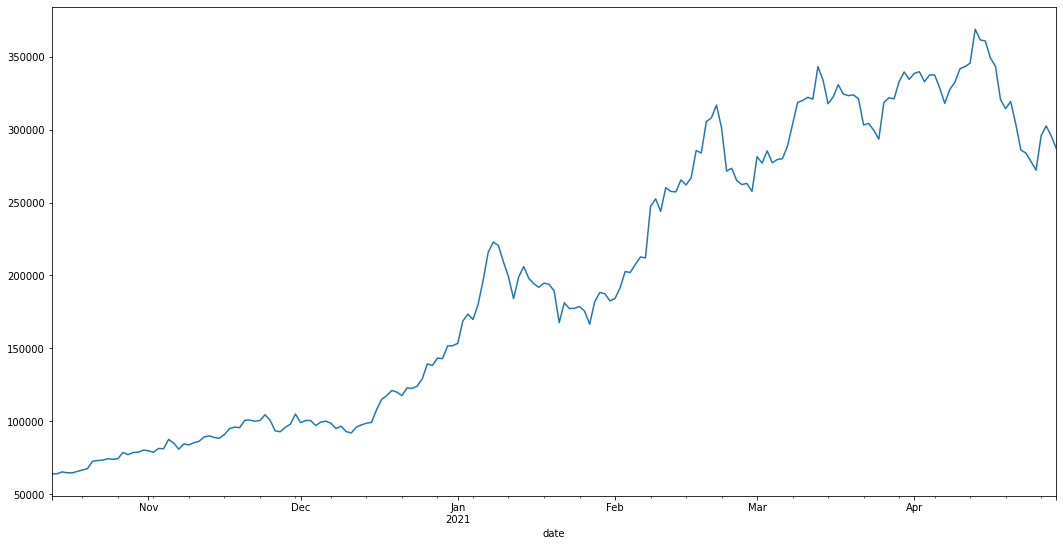

In [18]:
#Preços de Fechamento
btc_df['close'].plot(figsize=(18,9));